In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('train.csv')
test  = pd.read_csv('test.csv')

In [3]:
Id = test.Id
train.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 29 columns):
Id                 1048575 non-null object
groupId            1048575 non-null object
matchId            1048575 non-null object
assists            1048575 non-null int64
boosts             1048575 non-null int64
damageDealt        1048575 non-null float64
DBNOs              1048575 non-null int64
headshotKills      1048575 non-null int64
heals              1048575 non-null int64
killPlace          1048575 non-null int64
killPoints         1048575 non-null int64
kills              1048575 non-null int64
killStreaks        1048575 non-null int64
longestKill        1048575 non-null float64
matchDuration      1048575 non-null int64
matchType          1048575 non-null object
maxPlace           1048575 non-null int64
numGroups          1048575 non-null int64
rankPoints         1048575 non-null int64
revives            1048575 non-null int64
rideDistance       1048575 non-null flo

In [5]:
#Deal with null value
train = train.dropna()
train.isnull().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       0
dtype: int64

In [6]:
train['groupId'] = train['groupId'].astype('category')
train['matchId'] = train['matchId'].astype('category')

train['groupId_cat'] = train['groupId'].cat.codes
train['matchId_cat'] = train['matchId'].cat.codes

train.drop(columns=['groupId', 'matchId'], inplace=True)

train.drop(columns = ['Id'], inplace=True)

In [7]:
test['groupId'] = test['groupId'].astype('category')
test['matchId'] = test['matchId'].astype('category')

test['groupId_cat'] = test['groupId'].cat.codes
test['matchId_cat'] = test['matchId'].cat.codes

test.drop(columns=['groupId', 'matchId'], inplace=True)

test.drop(columns = ['Id'], inplace=True)

In [8]:
train.drop(['matchType'], axis=1, inplace=True)
test.drop(['matchType'], axis=1, inplace=True)

In [9]:
train.dtypes

assists              int64
boosts               int64
damageDealt        float64
DBNOs                int64
headshotKills        int64
heals                int64
killPlace            int64
killPoints           int64
kills                int64
killStreaks          int64
longestKill        float64
matchDuration        int64
maxPlace             int64
numGroups            int64
rankPoints           int64
revives              int64
rideDistance       float64
roadKills            int64
swimDistance       float64
teamKills            int64
vehicleDestroys      int64
walkDistance       float64
weaponsAcquired      int64
winPoints            int64
winPlacePerc       float64
groupId_cat          int32
matchId_cat          int32
dtype: object

In [10]:
test.dtypes

assists              int64
boosts               int64
damageDealt        float64
DBNOs                int64
headshotKills        int64
heals                int64
killPlace            int64
killPoints           int64
kills                int64
killStreaks          int64
longestKill        float64
matchDuration        int64
maxPlace             int64
numGroups            int64
rankPoints           int64
revives              int64
rideDistance       float64
roadKills            int64
swimDistance       float64
teamKills            int64
vehicleDestroys      int64
walkDistance       float64
weaponsAcquired      int64
winPoints            int64
groupId_cat          int32
matchId_cat          int16
dtype: object

### Features Correlations

#### Target Variables: winPlacePerc

In [11]:
train['winPlacePerc'].describe()

count    1.048575e+06
mean     4.727710e-01
std      3.075084e-01
min      0.000000e+00
25%      2.000000e-01
50%      4.583000e-01
75%      7.407000e-01
max      1.000000e+00
Name: winPlacePerc, dtype: float64

To find TOP10 correlated features

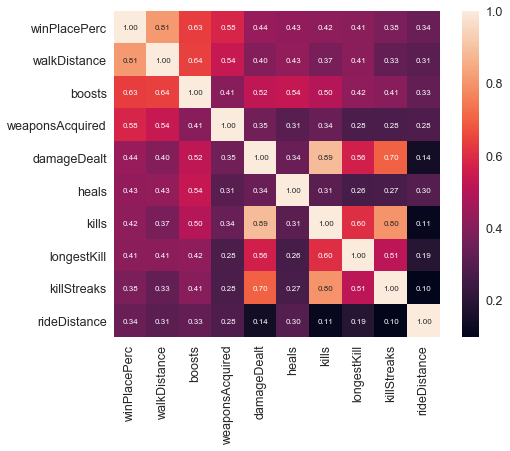

In [12]:
#winPlacePerc correlation matrix
k = 10 #number of variables for heatmap
corrmat = train.corr() 
cols = corrmat.nlargest(k, 'winPlacePerc').index # nlargest : Return this many descending sorted values
cm = np.corrcoef(train[cols].values.T) # correlation 
sns.set(font_scale=1.25)
f, ax = plt.subplots(figsize=(8, 6))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 8}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

So the target vlaue WinPlacePerc is highly related with walkDistance, boots, weaponAcquired and damageDealt.
So mainly explore these variables 

#### Boost and Heals 

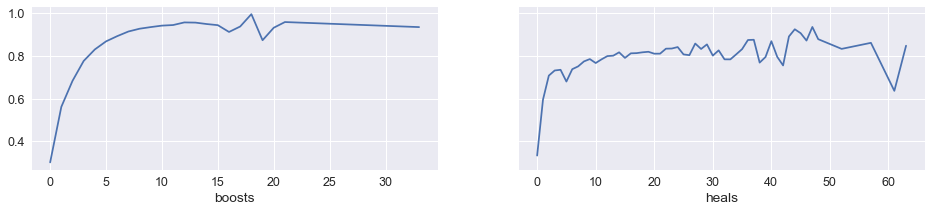

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(16, 3), sharey=True)

cols = ['boosts','heals']
for col, ax in zip(cols, ax.ravel()): 
    train.groupby(col).mean()['winPlacePerc'].plot.line(ax=ax)

#### DBNOs, Kills, HeadShotKills, RoadKills, DamageDealt, KillStreaks

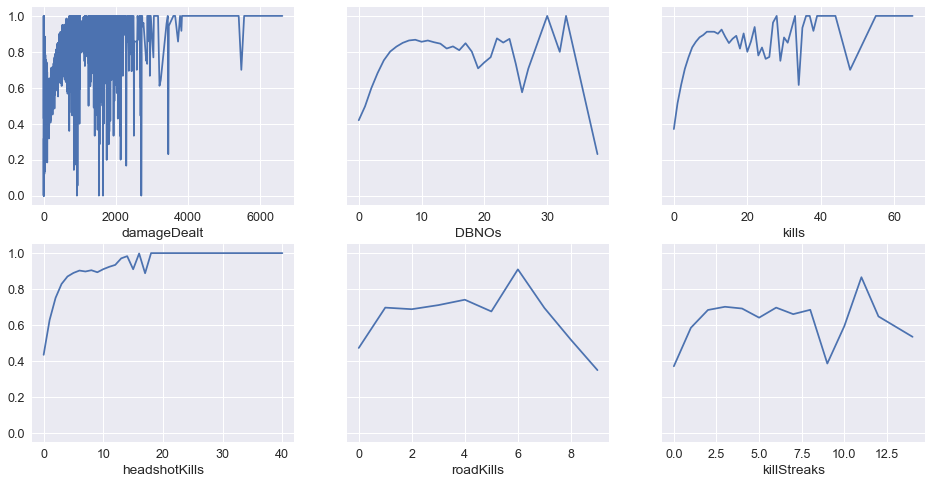

In [14]:
fig, ax = plt.subplots(2, 3, figsize=(16, 8), sharey=True)

cols = ['damageDealt','DBNOs','kills','headshotKills','roadKills','killStreaks']
for col, ax in zip(cols, ax.ravel()): 
    train.groupby(col).mean()['winPlacePerc'].plot.line(ax=ax)

#### WalkDistance, RideDistance, SwimDistance

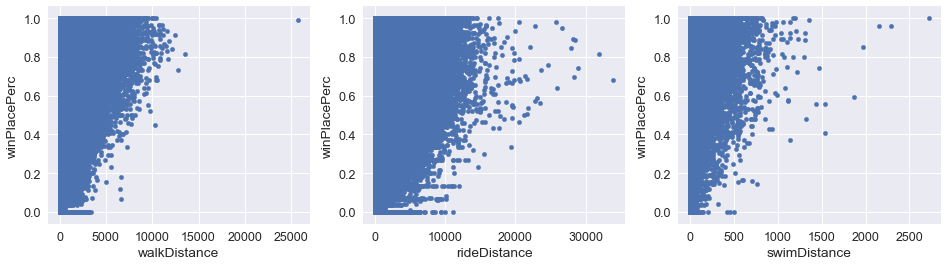

In [15]:
fig, ax = plt.subplots(1, 3, figsize=(16, 4))
train.plot.scatter(x='walkDistance', y='winPlacePerc', ax=ax[0])
train.plot.scatter(x='rideDistance', y='winPlacePerc', ax=ax[1])
train.plot.scatter(x='swimDistance', y='winPlacePerc', ax=ax[2])

### Naive Model

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [22]:
X = train.drop(['winPlacePerc'],axis = 1).values
y = train.winPlacePerc.values

X_train, X_test, y_train, y_test = train_test_split(X,y, 
                                                    train_size=0.8,
                                                    test_size=0.2,
                                                    random_state=123)


In [23]:
# assume everyone loses
y_train = y_train * 0

In [24]:
from sklearn.linear_model import LinearRegression

#Linear Regression
lr_naive = LinearRegression()
lr_naive.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [25]:
print("linearRegression score: ", lr_naive.score(X_train, y_train))
print("linearRegression score: ", lr_naive.score(X_test, y_test))

linearRegression score:  1.0
linearRegression score:  -2.358564704009153


In [26]:
print("linearRegression MAE train: ", mean_absolute_error(lr_naive.predict(X_train), y_train))
print("linearRegression MAE test: ", mean_absolute_error(lr_naive.predict(X_test), y_test))

linearRegression MAE train:  0.0
linearRegression MAE test:  0.4733342698424051


In [27]:
#prediction
predictions = lr_naive.predict(test)
pred_df = pd.DataFrame({'Id': Id,'winPlacePerc': predictions})
pred_df.to_csv("submission.csv", index = False)

In [29]:
train.columns

Index(['assists', 'boosts', 'damageDealt', 'DBNOs', 'headshotKills', 'heals',
       'killPlace', 'killPoints', 'kills', 'killStreaks', 'longestKill',
       'matchDuration', 'maxPlace', 'numGroups', 'rankPoints', 'revives',
       'rideDistance', 'roadKills', 'swimDistance', 'teamKills',
       'vehicleDestroys', 'walkDistance', 'weaponsAcquired', 'winPoints',
       'winPlacePerc', 'groupId_cat', 'matchId_cat'],
      dtype='object')

## Modeling


#### Create feature

In [31]:
kill = train[['DBNOs','winPlacePerc','kills', 'headshotKills']]
kill['KILL'] = (kill['kills'] + kill['DBNOs'] + kill['headshotKills'])
kill.corr()

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,DBNOs,winPlacePerc,kills,headshotKills,KILL
DBNOs,1.000000,0.280288,0.710054,0.473397,0.867637
winPlacePerc,0.280288,1.000000,0.419783,0.278866,0.390834
kills,0.710054,0.419783,1.000000,0.673677,0.949565
headshotKills,0.473397,0.278866,0.673677,1.000000,0.749583
KILL,0.867637,0.390834,0.949565,0.749583,1.000000


In [61]:
Distance = train[['walkDistance','rideDistance','swimDistance','winPlacePerc']]
Distance['TotalDistance'] = (Distance['walkDistance'] + Distance['rideDistance'] + Distance['swimDistance'])
Distance.corr()

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,walkDistance,rideDistance,swimDistance,winPlacePerc,TotalDistance
walkDistance,1.000000,0.311253,0.166350,0.811225,0.758068
rideDistance,0.311253,1.000000,0.050325,0.343140,0.855593
swimDistance,0.166350,0.050325,1.000000,0.149156,0.138681
winPlacePerc,0.811225,0.343140,0.149156,1.000000,0.677357
TotalDistance,0.758068,0.855593,0.138681,0.677357,1.000000


In [33]:
train['KILL'] = train['kills'] + train['DBNOs'] + train['headshotKills']
test['KILL'] = test['kills'] + test['DBNOs'] + test['headshotKills']

train['TotalDistance'] = train['walkDistance'] + train['rideDistance'] + train['rideDistance']
test['TotalDistance'] = test['walkDistance'] + test['rideDistance'] + test['rideDistance']

In [34]:
train.columns

Index(['assists', 'boosts', 'damageDealt', 'DBNOs', 'headshotKills', 'heals',
       'killPlace', 'killPoints', 'kills', 'killStreaks', 'longestKill',
       'matchDuration', 'maxPlace', 'numGroups', 'rankPoints', 'revives',
       'rideDistance', 'roadKills', 'swimDistance', 'teamKills',
       'vehicleDestroys', 'walkDistance', 'weaponsAcquired', 'winPoints',
       'winPlacePerc', 'groupId_cat', 'matchId_cat', 'KILL', 'TotalDistance'],
      dtype='object')

In [35]:
test.columns

Index(['assists', 'boosts', 'damageDealt', 'DBNOs', 'headshotKills', 'heals',
       'killPlace', 'killPoints', 'kills', 'killStreaks', 'longestKill',
       'matchDuration', 'maxPlace', 'numGroups', 'rankPoints', 'revives',
       'rideDistance', 'roadKills', 'swimDistance', 'teamKills',
       'vehicleDestroys', 'walkDistance', 'weaponsAcquired', 'winPoints',
       'groupId_cat', 'matchId_cat', 'KILL', 'TotalDistance'],
      dtype='object')

#### Linear Regression

In [36]:
X = train.drop(['winPlacePerc'],axis = 1).values
y = train.winPlacePerc.values

X_train, X_test, y_train, y_test = train_test_split(X,y, 
                                                    train_size=0.8,
                                                    test_size=0.2,
                                                    random_state=123)

In [37]:
#Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [38]:
print("linearRegression train score: ", lr.score(X_train, y_train))
print("linearRegression test score: ", lr.score(X_test, y_test))

linearRegression train score:  0.8311320632190727
linearRegression test score:  0.8318776298361231


In [40]:
print("linearRegression MAE train: ", mean_absolute_error(lr.predict(X_train), y_train))
print("linearRegression MAE test: ", mean_absolute_error(lr.predict(X_test), y_test))

linearRegression MAE train:  0.0925427135399049
linearRegression MAE test:  0.09255407209136667


In [56]:
#prediction
predictions = lr.predict(test)
pred_df = pd.DataFrame({'Id': Id,'winPlacePerc': predictions})
pred_df.to_csv("submission.csv", index = False)

#### Ridge

In [41]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.model_selection import cross_val_score

def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

In [42]:
model_ridge = Ridge()

In [43]:
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() 
            for alpha in alphas]
ridge = Ridge(alpha = alpha)

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number9.843215e-19
  overwrite_a=True).T
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.044103e-18
  overwrite_a=True).T
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.130797e-18
  overwrite_a=True).T
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number8.65802

NameError: name 'alpha' is not defined

Text(0,0.5,'rmse')

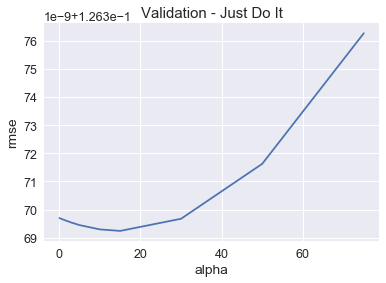

In [44]:
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Validation - Just Do It")
plt.xlabel("alpha")
plt.ylabel("rmse")

In [45]:
cv_ridge.min()

0.12630006924311488

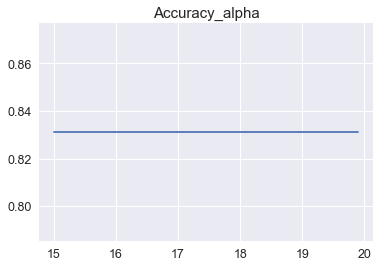

In [46]:
for i in np.arange(15,20,0.1):
    ridge = Ridge(alpha = i)
    ridgemodel=ridge.fit(X_train,y_train)
    ridgeaccuracy = ridgemodel.score(X_train,y_train)
cv_ridge = pd.Series(ridgeaccuracy, index = np.arange(15,20,0.1))
cv_ridge.plot(title = "Accuracy_alpha")

In [47]:
#...

In [48]:
print("ridgeRegression MAE train: ", mean_absolute_error(ridgemodel.predict(X_train), y_train))
print("ridgeRegression MAE test: ", mean_absolute_error(ridgemodel.predict(X_test), y_test))

ridgeRegression MAE train:  0.09254302622576978
ridgeRegression MAE test:  0.09255438797652918


In [49]:
ridgetrain = ridgemodel.score(X_train,y_train)
ridgetest = ridgemodel.score(X_test,y_test)
print("ridgetrain: ",ridgetrain)
print("ridgetest: ",ridgetest)

ridgetrain:  0.831132061874363
ridgetest:  0.8318775767440214


#### LASSO

In [50]:
model_lasso = LassoCV(alphas = [1, 0.1, 0.001, 0.0005]).fit(X_train, y_train)

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Applications/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did no

In [51]:
lassoaccuracy_train = model_lasso.score(X_train,y_train)
print("lassoaccuracy_train", lassoaccuracy_train)
lassoaccuracy_test = model_lasso.score(X_test,y_test)
print("lassoaccuracy_test", lassoaccuracy_test)

lassoaccuracy_train 0.8309831979705685
lassoaccuracy_test 0.8317070323248673


In [52]:
print("lasso MAE train: ", mean_absolute_error(model_lasso.predict(X_train), y_train))
print("lasso MAE test: ", mean_absolute_error(model_lasso.predict(X_test), y_test))

lasso MAE train:  0.0926172253915997
lasso MAE test:  0.09263251188142181


In [ ]:
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")

#### Random Forest

In [62]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor

In [56]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
print("RandomForest score: ", rf.score(X_train,y_train))
print("RandomForest score: ", rf.score(X_test,y_test))

RandomForest score:  0.9849994370979981
RandomForest score:  0.9166034669746079


In [55]:
print("lasso MAE train: ", mean_absolute_error(rf.predict(X_train), y_train))
print("lasso MAE test: ", mean_absolute_error(rf.predict(X_test), y_test))

lasso MAE train:  0.02479529530127127
lasso MAE test:  0.06275833966400828
